## Ensemble learning and random forests

### Can I eat that mushroom?

classic machine learning data set? When researchers create new methods they typically test their performance
on data sets people have looked at before, so that the prediction accuracy can be benchmarked against
existing methods. This means that certain data sets appear time and time again in research. One of these is
the famous ‘mushroom data set’: a set of observations about different specimens of gilled mushrooms in The
Audubon Society Field Guide to North American Mushrooms (1981). Each specimen is measured in terms of
some visual and olfactory information, such as its Cap Size and its Odor type. They are also labelled as
being edible or poisonous. Our goal is to determine whether a mushroom is edible from its characteristics.

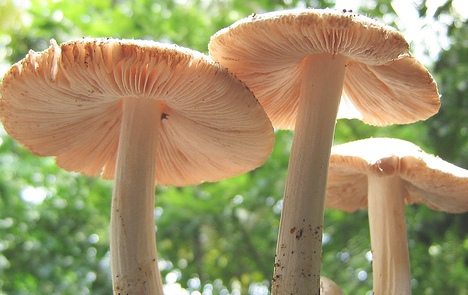
Figure 1: An example of gilled mushrooms. A classic machine learning task is to determine whether or not a
particular mushroom is poisonous based on its visual and olfactory characteristics


There are 6 attributes in the data, all of which are factors (non-numeric categorical variables). These are:
Edible (to be predicted), CapShape, CapSurface, CapColor, Odor and Height. 

Tasks:

1. Fit Random Forest models using each possible input on its own to predict edibility. Evaluate the
quality of fit by using the predict function to calculate the predicted class for each mushroom (edible
or poisonous). Which input fits best? (i.e. which classifies the most
mushrooms correctly?)

2. Using cross-validation, perform a model selection to determine which features are useful for making
predictions using a Random Forest. As above, use the number of mushrooms correctly classified as the
criterion for deciding which model is best. You might try to find a way to loop over all 32 possible
models. Or select features ‘greedily’, by picking one at a
time to add to the model. Present your results in the most convincing way you can.

3. Would you use this classifier if you were foraging for mushrooms? Discuss with reference to factors that
you identified as important and the probability of posioning yourself.

## Task 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm
import os
import seaborn as sns
df= pd.read_csv("mushrooms.csv")
df.describe()
df.info()
#This displays the column names and the basic info about the data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edible      8124 non-null   object
 1   CapShape    8124 non-null   object
 2   CapSurface  8124 non-null   object
 3   CapColor    8124 non-null   object
 4   Odor        8124 non-null   object
 5   Height      8124 non-null   object
dtypes: object(6)
memory usage: 380.9+ KB


In [2]:
df['Edible'].value_counts()
#The .value_counts() line outputs the number of edible and poisonous mushrooms. We can see that it is quite even.

Edible       4208
Poisonous    3916
Name: Edible, dtype: int64

In [3]:
df.isnull().sum()
#Checking if there are any null values

Edible        0
CapShape      0
CapSurface    0
CapColor      0
Odor          0
Height        0
dtype: int64

In [4]:
df = df.astype('category')
df.dtypes
#Here we change the category column to be of 'category' dataype.

Edible        category
CapShape      category
CapSurface    category
CapColor      category
Odor          category
Height        category
dtype: object

In [5]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

#Here we use the LablelEncoder to make the columns into machine-undestanble format

,Edible,CapShape,CapSurface,CapColor,Odor,Height
0,1,2,3,0,7,1
1,0,2,3,9,0,0
2,0,0,3,8,1,1
3,1,2,2,8,7,0
4,0,2,3,3,6,0


In [6]:
print(df.Edible)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: Edible, Length: 8124, dtype: int32


From the above figure we can see that all columns have different values sow will contribute to the data.

In [7]:
x_1=pd.DataFrame(df["CapShape"])
x_2=pd.DataFrame(df["CapSurface"])
x_3=pd.DataFrame(df["CapColor"])
x_4=pd.DataFrame(df["Odor"])
x_5=pd.DataFrame(df["Height"])
xlist=[x_1,x_2,x_3,x_4,x_5]
catlist =["CapShape","CapSurface","CapColor","Odor","Height"]

# Here we create a dataframe for each input and create a list which contains the names of the inputs

<ipython-input-8-ff595f760bf7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapShape
Test Accuracy: 55.38%
[0 0 0 ... 0 0 0]


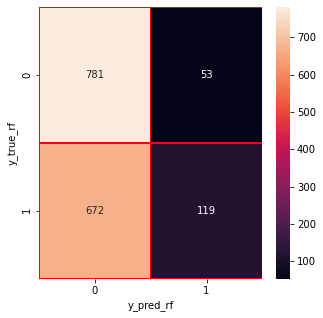

<ipython-input-8-ff595f760bf7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapSurface
Test Accuracy: 59.69%
[1 1 0 ... 1 0 0]


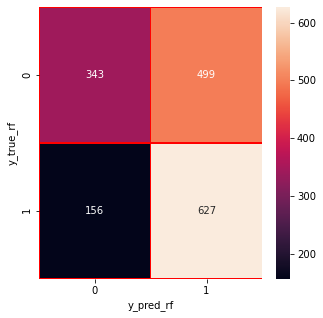

<ipython-input-8-ff595f760bf7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapColor
Test Accuracy: 60.31%
[1 0 1 ... 0 1 0]


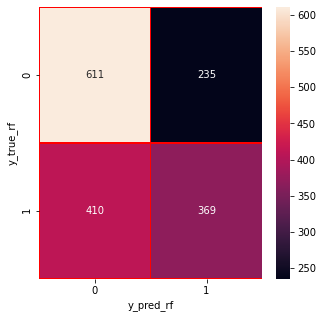

<ipython-input-8-ff595f760bf7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input Odor
Test Accuracy: 98.28%
[0 0 0 ... 0 0 0]


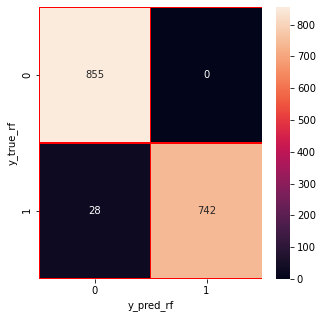

<ipython-input-8-ff595f760bf7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input Height
Test Accuracy: 51.88%
[0 0 0 ... 0 0 0]


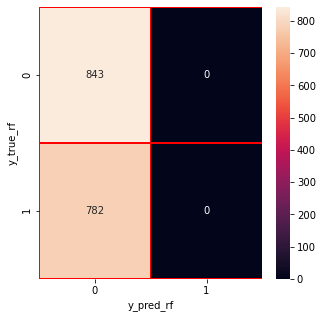

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix

#create dataframe for output which our y. This represents if a mushroom is edible or not
y = pd.DataFrame(df["Edible"])
# create a loop so a random forest classifcation can be done for each input
for i,j in zip(xlist,catlist):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train,y_train)
    print("For the input",j)
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    prediction = rf.predict_proba(X_test) # predict probability outcome of test data with model
    predictEP = rf.predict(X_test) # predict whether edible or poisonous
    prediction[:,1]
    number_of_trees = 100 
    prediction = (number_of_trees*prediction + 1)/(number_of_trees + 2) # alter so that accuracy cannot be 100%
    print(predictEP)
    #now we will create a confusion matrix to show the performance of the random forsest classification.
    y_pred_rf = rf.predict(X_test)
    y_true_rf = y_test
    cm = confusion_matrix(y_true_rf, y_pred_rf)
    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
    plt.xlabel("y_pred_rf")
    plt.ylabel("y_true_rf")
    plt.show()

                                

A cofusion matrix was done for each input's claffication. From the test accuracy results we can see that "Odor" is the best input to claddify the mushrooms with a test accuracy of 98.4% while the other inputs had test accuracies at between 56-60% accuracy. From this we can say that the other 3 inputs alone are not good at classifying as the test accuracy is so low that there is a high probability the musrooms claffication is wrong as it is right.
The confusion matrix shows the amount of true poisonous (top left square), true edible ( bottom right), false poisonous (bottom left) and false edible (top right).The number in the true poisonous square is the number of poisonous mushrooms that the classification has labelled poisonous (so accurate) ;the true edible number is the number of edible mushrooms that the classification has classified as edible ,the false poisonous number is the number of edible mushrooms that the classification has labelled as poisonous and the false edible number is the number of poisonous mushrooms that the classification has labelled as edible. Using Odor as the only classification , we can see that there is a high number of accurate clasiifcation ( true poisonous and true edible) and very little false classifications ( false edibles and false). While the other single input classification have many values in the false edibles and false poisonous showing that there are a lot of mushrroms that the other 3 calssifiers classfied wrong.

### Task 2

In [9]:
LblList =["CapShape","CapSurface","CapColor","Odor", "Height"]

In [10]:
y = pd.DataFrame(df["Edible"])
score_list1 =[]

for i,j in zip(xlist,LblList):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train,y_train)
    print("For the input",j)
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    score_list1.append(rf.score(X_test,y_test))
    
best=score_list1.index(max(score_list1))
print("The best single input to obtain the highest test accuracy is",LblList[best])




<ipython-input-10-b904ec05a69b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapShape
Test Accuracy: 55.32%


<ipython-input-10-b904ec05a69b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapSurface
Test Accuracy: 58.34%


<ipython-input-10-b904ec05a69b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input CapColor
Test Accuracy: 59.94%


<ipython-input-10-b904ec05a69b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input Odor
Test Accuracy: 98.4%


<ipython-input-10-b904ec05a69b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the input Height
Test Accuracy: 51.45%
The best single input to obtain the highest test accuracy is Odor


In [11]:
x_1=df[["Odor", "CapShape"]]
x_2=df[["Odor", "CapSurface"]]
x_3=df[["Odor", "CapColor"]]
x_4=df[["Odor", "Height"]]
score_list2 =[]
LblList2 =["CapShape","CapSurface","CapColor", "Height"]
Xlist2=[x_1,x_2,x_3,x_4]
#here we have made new dataframes to include 2 inputs where one will be odor due to greedy method where all these pairs will go through classification. Also make a new list without odor .
#loop so all pairs can go through classification
for i,j in zip(Xlist2,LblList2):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2,random_state=42)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    print("For the inputs",j,"and Odor")
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    score_list2.append(rf.score(X_test,y_test))
    
best=score_list2.index(max(score_list2))
# find the hightest test accuracy and then output which pairing this is where one of them is odor.
print("Using the greedy method the 2nd input which has the highest test accuracy with Odor is",LblList2[best])

<ipython-input-11-03cbdb14e9bc>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapShape and Odor
Test Accuracy: 98.52%


<ipython-input-11-03cbdb14e9bc>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapSurface and Odor
Test Accuracy: 98.52%


<ipython-input-11-03cbdb14e9bc>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapColor and Odor
Test Accuracy: 98.77%


<ipython-input-11-03cbdb14e9bc>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs Height and Odor
Test Accuracy: 98.46%
Using the greedy method the 2nd input which has the highest test accuracy with Odor is CapColor


In [12]:
x_1=df[["Odor", "CapColor", "CapShape"]]
x_2=df[["Odor", "CapColor","CapSurface"]]
x_3=df[["Odor", "CapColor", "Height"]]
score_list3 =[]
LblList3 =["CapShape","CapSurface", "Height"]
Xlist3=[x_1,x_2,x_3]

# This code is the same as above bt now we are doinga a  classification on 3 inputs where the first 2 inputs are fixed due to greedy method.
for i,j in zip(Xlist3,LblList3):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2,random_state=60)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    print("For the inputs",j," , Odor and CapColor")
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    score_list3.append(rf.score(X_test,y_test))
    
best=score_list3.index(max(score_list3))
print("Using the greedy method the 3rd input which has the highest test accuracy with Odor and CapColor is",LblList3[best])

<ipython-input-12-25cd5dc8fd39>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapShape  , Odor and CapColor
Test Accuracy: 99.08%


<ipython-input-12-25cd5dc8fd39>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapSurface  , Odor and CapColor
Test Accuracy: 98.89%


<ipython-input-12-25cd5dc8fd39>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs Height  , Odor and CapColor
Test Accuracy: 98.89%
Using the greedy method the 3rd input which has the highest test accuracy with Odor and CapColor is CapShape


In [13]:
x_1=df[["Odor", "CapColor", "CapShape","CapSurface"]]
x_2=df[["Odor", "CapColor", "CapShape","Height"]]
score_list4 =[]
LblList4 =["CapSurface", "Height"]
Xlist4=[x_1,x_2]


for i,j in zip(Xlist4,LblList4):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2,random_state=20)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    print("For the inputs",j," , Odor,CapColor and CapShape")
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    score_list4.append(rf.score(X_test,y_test))
    
best=score_list4.index(max(score_list4))
print("Using the greedy method the 4th input which has the highest test accuracy with Odor , CapColor and CapShape is",LblList4[best])

<ipython-input-13-2ecf9d3fd54f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapSurface  , Odor,CapColor and CapShape
Test Accuracy: 98.58%


<ipython-input-13-2ecf9d3fd54f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs Height  , Odor,CapColor and CapShape
Test Accuracy: 98.71%
Using the greedy method the 4th input which has the highest test accuracy with Odor , CapColor and CapShape is Height


In [14]:
x_1=df[["Odor", "CapColor", "CapShape","CapSurface","Height"]]
score_list5 =[]
LblList5 =["CapSurface"]
Xlist5=[x_1]


for i,j in zip(Xlist5,LblList5):
    X_train, X_test, y_train, y_test = train_test_split(i,y,test_size=0.2,random_state=20)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)
    print("For the inputs",j," , Odor,CapColor ,CapShape and Height")
    print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
    score_list5.append(rf.score(X_test,y_test))
    



<ipython-input-14-dae782e30f89>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


For the inputs CapSurface  , Odor,CapColor ,CapShape and Height
Test Accuracy: 98.83%


From using the Greedy method we can see the best classification is when there are 3 inputs of which are Height color and CapColor. This means that using more than 3 inputs is over classifying and is worse for knowing which mushroom is edible or not. However the best classifiers using 1,2,3,4 and 5( of which there is only 1) inputs have a test accuracy of higher  than 98% so are all very good classifiers.

### Task 3

I would use the above classifiers foraging over a small amont of mshrooms as if the test accuracy is high then witha  a small sample size the probability of one being poisonous when the classifier has classified it as edible is low, however as the sample size of the mushrroms I am testing increases, then i would not as there only needs to be one mushrrom that has been classified as edible that is actually posionous to cause a problem. So the probability that there are no false edibles is very low over a big sample size. 

## Self Assessment:

Task 1:10/10
Task 2 :10/10
Task 3:10/10
Presentation : 10/10 
Bonus marks: 5/5 as I added confusion matrix for each single input classification in task 1 showing all the false poisonous, false edible, true edible and true poisonous values.